We'll start by loading a couple of libraries:

In [1]:
import dimspy
import os

Now we can begin setting our basic parameters:

In [19]:
# The directory where our mzML files are located.
data_dir = "/home/keo7/Data/dimspy-example/"

# The total number of threads to use for processing, 1 is the default.
n_jobs = 16

polarity = "positive"

processing_parameters = {
    "MS1 Precision" : 5e-6,
    "MSn Precision" : 5e-6,
    "Measured Precision" : 5e-6,
    "Scan Range" : "apex",
    "Peak Type" : "peaks"
}

injection_order = {
    "C029" : 1,
    "MM02" : 2,
    "C030" : 3,
    "MM03" : 4,
    "ctrl02" : 5,
    "ctrl01": 6,
    "MM04" : 7,
    "C027" : 8,
    "C032" : 9,
    "MM01" : 10
}

In [20]:
os.listdir(data_dir)

['C029.mzML',
 'MM02.mzML',
 'C030.mzML',
 'MM03.mzML',
 'ctrl02.mzML',
 'ctrl01.mzML',
 'MM04.mzML',
 'C027.mzML',
 'C032.mzML',
 'MM01.mzML']

In [21]:
spectrum_list = dimspy.SpectrumList()

In [22]:
for file in os.listdir(data_dir):
    spectrum = dimspy.Spectrum(os.path.join(data_dir, file),
                              polarity=polarity,
                              parameters=processing_parameters,
                              injection_order=injection_order[file.split(".")[0]])
    spectrum_list.append(spectrum)

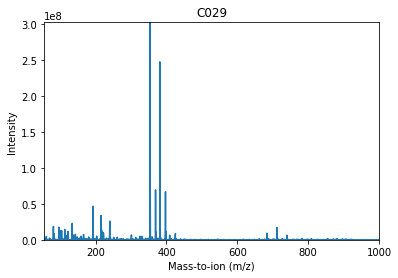

In [23]:
spectrum_list.to_list()[0].plot(scaled=False)

In [16]:
processor = dimspy.SpectrumListProcessor(spectrum_list)

/home/keo7/.virtualenvs/dimspy/local/lib/python2.7/site-packages/dimspy/SpectrumListProcessor.py:56: UserWarning:

Outlier detection removed: MM02,ctrl02,ctrl01,C027,MM02,ctrl02,ctrl01,C027



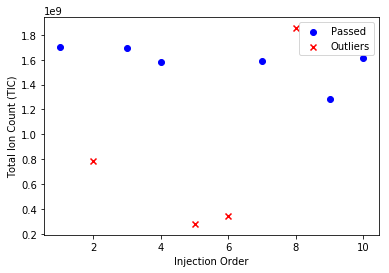

In [24]:
processor.outlier_detection(plot=True, mad_threshold=1)

In [25]:
processor.binning(bin_size=0.05,
                  n_jobs=n_jobs,
                  statistic="mean",
                  inplace=True)

In [26]:
processor.center(n_jobs=16)

In [27]:
processor.value_imputation(method="basic",
                           threshold=0.85)

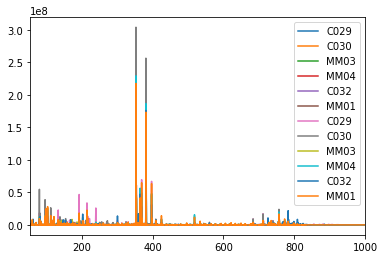

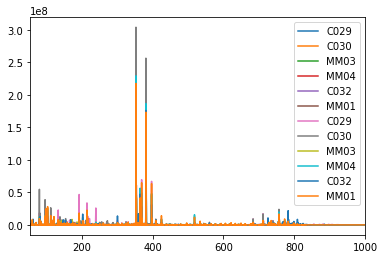

In [29]:
binned_spectrum = processor.to_spectrumlist()
b_df = binned_spectrum.flatten_to_dataframe()

import matplotlib.pyplot as plt
plt.figure()
b_df.T.plot()
plt.show()